# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Dataset Description  
<table style="text-align: left;" >
    <tr style="text-align: left;" >
        <td>#</td>
        <td>Column</td>
        <td style="text-align: left;" >description</td>
    </tr>
    <tr style="text-align: left;" >
        <td>0</td>
        <td>id</td>
        <td>primary key for table</td>
    </tr>
    <tr style="text-align: left;" >
        <td>1</td>
        <td>imdb_id</td>
        <td>Movie number ID imdb</td>
    </tr>
    <tr>
        <td>2</td>
        <td>popularity</td>
        <td>The popularity of the Movie based on views and ratings for more here  https://developers.themoviedb.org/3/getting-started/popularity   </td>
    </tr>
    <tr>
        <td>3</td>
        <td>budget</td>
        <td>The cost of producing the Movie </td>
    </tr>
    <tr>
        <td>4</td>
        <td>revenue</td>
        <td>The movie's total revenue</td>
    </tr>
    <tr>
        <td>5</td>
        <td>original_title</td>
        <td>Movie title on release date</td>
    </tr>
    <tr>
        <td>6</td>
        <td>cast</td>
        <td>The name lead and supporting actors</td>
    </tr>
    <tr>
        <td>7</td>
        <td>homepage</td>
        <td>link URL for homepahe for move </td>
    </tr>
    <tr>
        <td>8</td>
        <td>director</td>
        <td>director of the movie</td>
    </tr>
    <tr>
        <td>9</td>
        <td>tagline</td>
        <td>Brief description of a Movie in one line</td>
    </tr>
    <tr>
        <td>10</td>
        <td>keywords</td>
        <td>Keywords for search engines</td>
    </tr>
    <tr>
        <td>11</td>
        <td>overview</td>
        <td>Overview of the Movie - a brief description</td>
    </tr>
    <tr>
        <td>12</td>
        <td>runtime</td>
        <td>the show length</td>
    </tr>
    <tr>
        <td>13</td>
        <td>genres</td>
        <td>Movie type or genre</td>
    </tr>
    <tr>
        <td>14</td>
        <td>production_companies</td>
        <td>Movie producing companies</td>
    </tr>
    <tr>
        <td>15</td>
        <td>release_date</td>
        <td>Show start date </td>
    </tr>
    <tr>
        <td>16</td>
        <td>vote_count</td>
        <td>The number of people who voted</td>
    </tr>
    <tr>
        <td>17</td>
        <td>vote_average</td>
        <td>Vote rate</td>
    </tr>
    <tr>
        <td>18</td>
        <td>release_year</td>
        <td>The year the Movie was released</td>
    </tr>
    <tr>
        <td>19</td>
        <td>budget_adj</td>
        <td>the movie  budget, adjusted for inflation</td>
    </tr>
    <tr>
        <td>20</td>
        <td>revenue_adj</td>
        <td>the movie revenue, adjusted for inflation </td>
    </tr>
</table>
 
 
 

### Question(s) for Analysis
I want to focus on profits and revenue growth, I want to focus on this area through this investigation..let's start

In [443]:
# Use this cell to set up import statements for all of the packages that you
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline
%timeit

#Change the font size of the charts
plt.rcParams.update({'font.size': 14})


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [444]:
# Load  data 
df_tmdb = pd.read_csv('tmdb-movies.csv')
#data check
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [445]:
#Take a look at the first 10 results
df_tmdb.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [446]:
# number of rows
df_tmdb.shape[0]-1

10865

In [447]:
#number of columns
df_tmdb.shape[1]

21

In [448]:
# Show simple statistics about the data
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [449]:
# Show revenue_adj column results that are less than one
df_tmdb.loc[df_tmdb['revenue_adj'] < 1]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.0


In [450]:
# Show budget column results that are less than one
df_tmdb.loc[df_tmdb['budget_adj'] < 1]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.000000e+00
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.000000e+00


In [451]:
# drop records from the budget and revenue whose value is less than 1
df_tmdb.drop(df_tmdb[(df_tmdb['budget_adj'] < 1) | (df_tmdb['revenue_adj'] < 1)].index, inplace=True)

In [452]:
# Show budget_adj column results that are less than one
df_tmdb.loc[df_tmdb['budget_adj'] < 1]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [453]:
# Show revenue_adj column results that are less than one
df_tmdb.loc[df_tmdb['revenue_adj'] < 1]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


### missing values 



In [454]:
#Check missing values
df_tmdb.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       4
homepage                2429
director                   1
tagline                  280
keywords                 138
overview                   0
runtime                    0
genres                     0
production_companies      46
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
 

In [455]:
# Duplicate check
sum(df_tmdb.duplicated()) 

1

In [456]:
#  see Duplicate check
df_tmdb[df_tmdb.duplicated()].head(10)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [457]:
# lock Duplicate 
df_tmdb.loc[df_tmdb['id'] == 42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [458]:
# drop Duplicate 
df_tmdb.drop_duplicates(inplace=True)

In [459]:
# Duplicate check 
sum(df_tmdb.duplicated()) 

0

### remove the unused colums that are not needes in the analysis process 

In [460]:
##drop the unused colums that are not needes in the analysis process 

#array unused colums
del_col=['imdb_id','budget','revenue','tagline','homepage','keywords','overview','production_companies','cast','director','production_companies','genres'];   

#drop colums
df_tmdb.drop(del_col,axis=1, inplace=True)

In [461]:
#Take a look at the data
df_tmdb.head(10)

,id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,The Revenant,156,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,Terminator Genisys,125,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,The Martian,141,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,Minions,91,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,Inside Out,94,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


###  Fix the type of data columns 



In [462]:
#Data Check
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3853 non-null   int64  
 1   popularity      3853 non-null   float64
 2   original_title  3853 non-null   object 
 3   runtime         3853 non-null   int64  
 4   release_date    3853 non-null   object 
 5   vote_count      3853 non-null   int64  
 6   vote_average    3853 non-null   float64
 7   release_year    3853 non-null   int64  
 8   budget_adj      3853 non-null   float64
 9   revenue_adj     3853 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 331.1+ KB


In [463]:
#fix col data type 
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])

# To make the numbers easier to read, we will Convert Floats to Integers

df_tmdb['budget_adj'] = df_tmdb['budget_adj'].astype(int)
df_tmdb['revenue_adj'] = df_tmdb['revenue_adj'].astype(int)

In [464]:
#Show data format after modification
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3853 non-null   int64         
 1   popularity      3853 non-null   float64       
 2   original_title  3853 non-null   object        
 3   runtime         3853 non-null   int64         
 4   release_date    3853 non-null   datetime64[ns]
 5   vote_count      3853 non-null   int64         
 6   vote_average    3853 non-null   float64       
 7   release_year    3853 non-null   int64         
 8   budget_adj      3853 non-null   int32         
 9   revenue_adj     3853 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(4), object(1)
memory usage: 301.0+ KB


In [465]:
#Show data format after modification
df_tmdb.head(10)

,id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,137999939,1392445892
1,76341,28.419936,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,137999939,348161292
2,262500,13.112507,Insurgent,119,2015-03-18,2480,6.3,2015,101199955,271619025
3,140607,11.173104,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,183999919,1902723129
4,168259,9.335014,Furious 7,137,2015-04-01,2947,7.3,2015,174799923,1385748801
5,281957,9.110700,The Revenant,156,2015-12-25,3929,7.2,2015,124199945,490314247
6,87101,8.654359,Terminator Genisys,125,2015-06-23,2598,5.8,2015,142599937,405355075
7,286217,7.667400,The Martian,141,2015-09-30,4572,7.6,2015,99359956,547749654
8,211672,7.404165,Minions,91,2015-06-17,2893,6.5,2015,68079970,1064192016
9,150540,6.326804,Inside Out,94,2015-06-09,3935,8.0,2015,160999929,785411574


In [466]:
#Take a look at the data to check the data
df_tmdb.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3.853000e+03,3.853000e+03
mean,39883.148196,1.191728,109.225279,527.842979,6.168388,2001.258500,4.425147e+07,1.322001e+08
std,67230.525086,1.475314,19.922999,880.038066,0.794900,11.282948,4.480940e+07,2.141836e+08
min,5.000000,0.001117,15.000000,10.000000,2.200000,1960.000000,1.000000e+00,-2.147484e+09
25%,6073.000000,0.462287,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.820469e+07
50%,11321.000000,0.797723,106.000000,204.000000,6.200000,2004.000000,3.001664e+07,6.151774e+07
75%,38568.000000,1.368403,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.625413e+08
max,417859.000000,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,1.907006e+09


<a id='eda'></a>
## Exploratory Data Analysis
 
 
### Research Question 1 (What Top 10 Years in the Release of Movies?) 
To answer this question, we will group the Movies over the years, count the number of Movies for each year Then, sort the results from highest to lowest, and then display them in a graph


<AxesSubplot:title={'center':'Top 10 Years in the Release of a Movies'}, xlabel='Years', ylabel='Movies'>

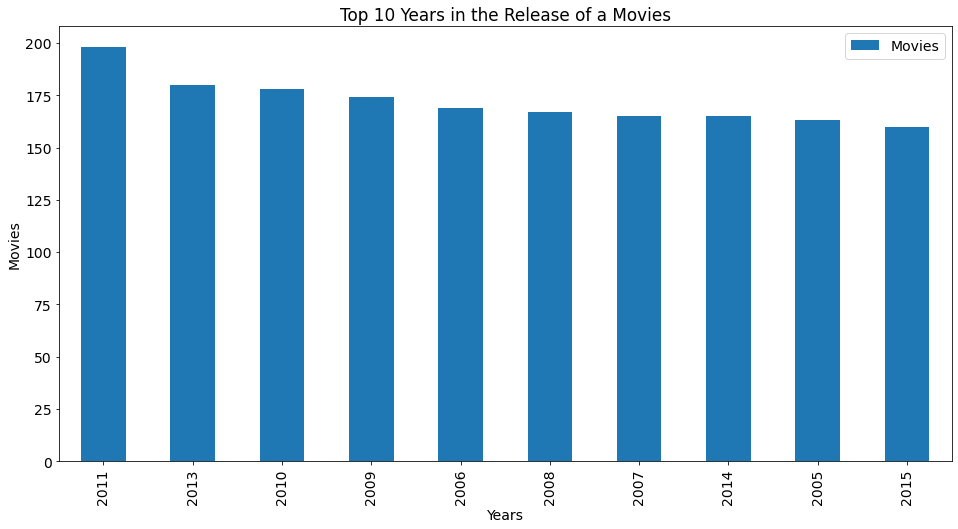

In [467]:
# Calculate the number of Movies for each year and Sorted from highest to least
best= df_tmdb.groupby('release_year').count().sort_values(['id'], ascending=False).head(10)
#Chart top 10 years in Movies production
best.rename({'id':'Movies'}, axis=1).head(10).plot(y='Movies',ylabel="Movies",xlabel='Years',title='Top 10 Years in the Release of a Movies', kind='bar', figsize=(16,8) )



### Research Question 2 (Do incomes grow over the years?) 
To answer this question, we will calculate the incomes for each movie, and then display them in a graph arranged by year


<AxesSubplot:title={'center':'Movies annual  income'}, xlabel=' Years', ylabel='income'>

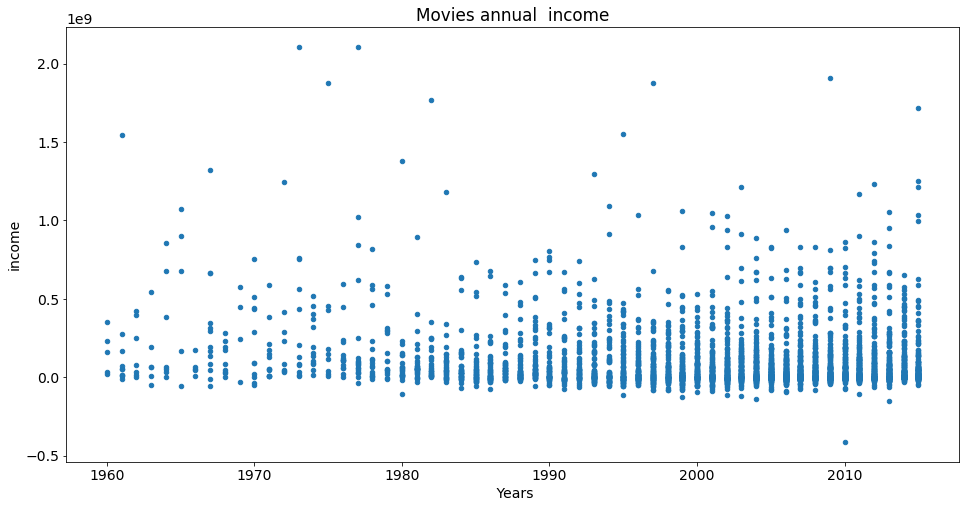

In [468]:
# Add a new column and calculate the incomes 
incomes = df_tmdb.assign(income = df_tmdb.revenue_adj - df_tmdb.budget_adj)
#Graph to show incomes over the years
incomes.sort_values(['income'], ascending=False).plot(kind = 'scatter',y='income',x='release_year',figsize=(16,8),title='Movies annual  income',xlabel=' Years' )

### Research Question 3: Has spending on movies increased, and does higher spending increase profitability?
To answer this question.. we will calculate the total budgets for the movies for each year, as well as the total profits for each year. We will review the answer in the form of a graph 

In [469]:
# Calculate the total income and the budget over the years
avr =  incomes.groupby(['release_year']).agg({'income':sum,'budget_adj':sum})
avr.head(10)

,income,budget_adj
release_year,,
1960,7.977407e+08,153408948.0
1961,2.181770e+09,281851548.0
1962,1.202945e+09,284373305.0
1963,8.217533e+08,435149760.0
1964,2.071668e+09,238573252.0
1965,2.763256e+09,406929142.0
1966,3.524854e+08,216776897.0
1967,4.159569e+09,624260930.0
1968,1.054890e+09,338210582.0


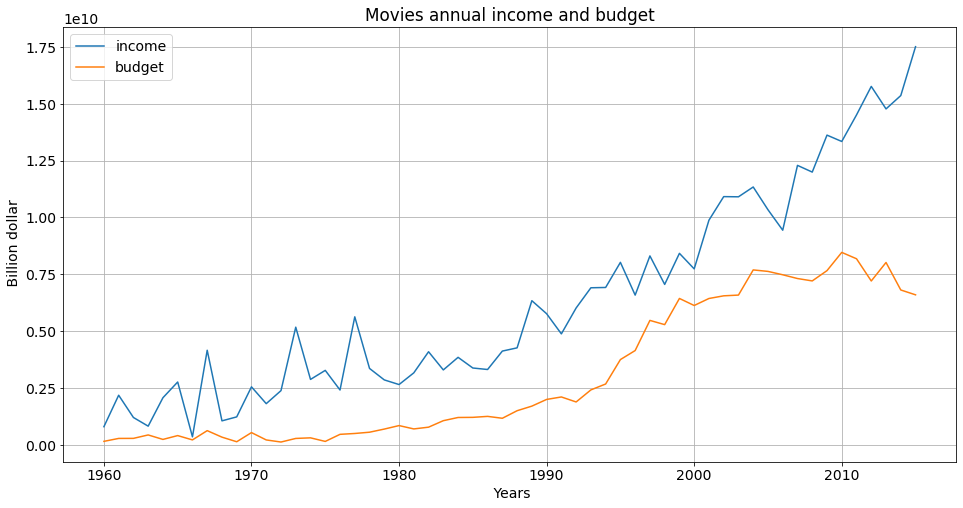

In [470]:
#Chart to compare budget with income
label_name=['test','test']
avr.plot(grid=1,figsize=(16,8),title='Movies annual income and budget',xlabel=' Years',ylabel=' Billion dollar').legend(['income', 'budget'])


<a id='conclusions'></a>
## Conclusions

Based on our first question, I noticed that production has advanced in the last 10 years, and this indicates the growth of the film production sector.
But the question remains, does this mean an increase in profits? We asked the second question: Are profits also growing? The answer was clearly through the data. There is an increasing growth
To keep us the last question, do budgets have an impact on profits? Indeed, it is an influential factor, which was evident through the presentation of the budgets and annual profits of the films.

It seems to me through the current investigation that spending in budgets has developed, as well as profits, which means the growth of the market and we may witness booms in the coming years.


In [471]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1